# Logistic Regression

## Author: Asad Mahmood

## Problem 1

Given the function f(x) = x^2 + 6x:

### Part 1: Use derivative of f(x) to find the value of x that minimizes this function.

In [ ]:
#Importing library to calculate derivatie of the eq, plot the graph
import matplotlib.pyplot as plt
import numpy as np
from numpy import array,  newaxis, expand_dims
from sympy import Symbol, Derivative
import pandas as pd
from pandas import DataFrame
import statistics
from sklearn.metrics import accuracy_score

In [ ]:
#Defining x as a symbol
x = Symbol('x')

function = x**2 + 6*x

deriv = Derivative(function, x)
res = deriv.doit()
print("The function f(x) having the eq:", function, "has the following as its derivative eq: ", res)

The function f(x) having the eq: x**2 + 6*x has the following as its derivative eq:  2*x + 6


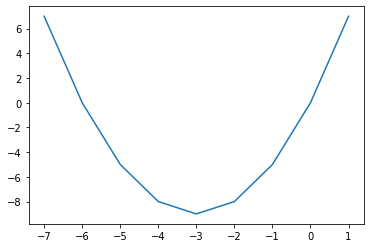

In [ ]:
# Create the vectors X and Y
x = np.array(range(-7,2))
y = x ** 2 + 6 * x

# Create the plot
plt.plot(x,y)

# Show the plot
plt.show()

Seeing the graph it is clear that it’s minimum value when **x = -3** (i.e when x=-3, y= -9)

In [ ]:
#Storing min value of X
minX = -3

NOTE: By hand solution is in the attached pdf.

### Part 2: Use gradient descent to find the value of x that minimizes this function. Compare your answer with the previous part.

### Initializing Parameters

In [ ]:
# Random value assigned to x_0
x_0 = 3

# Assigning Learning Rate
learningRate = 0.1 # Learning rate

### Stopping parameters for the loop

In [ ]:
# Parameter 1 - Tracking iterations, basically stopping when "iterationCount" exceds "maxIterations".
maxIterations = 10000 
iterationCount = 0

In [ ]:
# Parameter 2 - Tracking difference btw steps and if its smaller than established "diff" parameter the loop will stop
diff = 0.00000001 
prevStepSize = 1 

### Plugging in derivative of the equation - gradient basically

In [ ]:
eq = lambda x: 2*x + 6

### Performing gradient descent

In [ ]:
while prevStepSize > diff and iterationCount < maxIterations:
    prevX = x_0 
    
    # Gradient descent eq
    x_0 = prevX - learningRate * eq(prevX)
    
    # Value of X updated
    prevStepSize = abs(x_0 - prevX)
    
    #Updating iteration counter
    iterationCount += 1
    
print("The local minimum occurs at", x_0, "at itertion number", iterationCount)

The local minimum occurs at -2.9999999652623734 at itertion number 85


### Comparison between the results of part 1 and part 2

In [ ]:
diff = minX - x_0
print("The difference between the min X value found by hand and through programming is: ",diff)

The difference between the min X value found by hand and through programming is:  -3.473762655303858e-08


This difference is insignificant, but since its not equal to minX value found by hand. The found value is still gonna be called as **"Local Minimum"** rather than **"Global Minimum"**.

## Problem 2

The Space Shuttle Challenger disaster occurred on January 28, 1986, when it
broke apart 73 seconds into its 
ight, leading to the deaths of its seven crew
members. The spacecraft disintegrated over the Atlantic Ocean, o the coast
of central Florida at 11:38 EST. Disintegration of the entire vehicle began afteran O-ring seal in its right solid rocket booster failed at lifto. Subsequently, a special commission was appointed to investigate the accident.
<br>
The commission found that NASA disregarded warnings from engineers about the dangers of
launching posed by the low temperatures of that morning, claiming that en-
gineers could not provide a convincing argument against the launch (source:
Wikipedia, Applied Probability for Engineers).
<br>
File Oring.csv provides data on launch temperature and O-ring failure for
the 24-space shuttle launches prior to the Challenger disaster. There are six
O-rings used to seal field joints on the rocket motor assembly. A +1 in the
O-rings indicates that at least one O-ring failure had occurred on that launch
and a 0 indicates that no failure had occurred.

### Part 1

#### Normalize the launch temperature

In [ ]:
# Reading in dataset
trainData = pd.read_csv("ORing.csv")

In [ ]:
# Separtaing x and y values
# Getting all feature columns
X = trainData.iloc[:, :-1]

# Getting the dependant variable column
y = trainData.iloc[:, -1]

In [ ]:
# Temp data extraction
xValues = trainData.iloc[:,0].values

#Calculating mean and standard deviation of temp data
xMean = statistics.mean(xValues)
xSD = statistics.stdev(xValues)

In [ ]:
#Normalize data
Normalized = []
for i in range(len(xValues)):
    Normalized.append(((xValues[i] - xMean)/xSD,y[i]))

The data has been scaled using the formula -> (dataPoint - dataMean)/dataStandardDeviation.

### Part 2

####  Create a logistic regression model using the gradient decent technique to predict the probability of O-ring failure based on the launch temperature. Provide the equation for your model.

In [ ]:
#Normalized Temp Dataframe
trainNormalizedData = DataFrame(Normalized, columns = ['Temp', 'Faliure'])

In [ ]:
X = trainNormalizedData.iloc[:,: -1]
y = trainNormalizedData.iloc[:, -1].values

In [ ]:
#This function initializes the weight and intercept.
def weightAndIntercept(x):
    m = X.shape[0]
    n = X.shape[1]
    weight = np.zeros((1,n))
    intercept = 1
    return m, weight, intercept

In [ ]:
#This function is the core of logistic regression and it implements the Sigmoid/Logistic function
def sigmoid(power):
    return 1/(1+np.exp(-power))

In [ ]:
#This function calculates the power in sigmoid function which has x, weights and the intercept.
def sigmoidPowerCalculation(weight, X, intercept):
    return np.dot(weight, X.T) + intercept

In [ ]:
#This function calculates likelihood
def likelihoodExpCalculation(m, Y, hx):
    return (-1/m)*(np.sum((Y.T*np.log(hx)) + ((1-Y.T)*(np.log(1-hx)))))

In [ ]:
def gradientCalc(m, x, y, sigPow):
    w = (1/m)*(np.dot(x.T, (sigPow - y.T).T))
    b = (1/m)*(np.sum(sigPow - y.T))
    return w,b

In [ ]:
def Gradient(weight, m, intercept, X, Y):
    
    #Prediction
    sigmoidResult = sigmoid(sigmoidPowerCalculation(weight, X, intercept))
    Exp = likelihoodExpCalculation(m, Y, sigmoidResult)
    
    #Gradient calculation
    dw, db = gradientCalc(m, X, Y, sigmoidResult)
    
    weightAndIntercept = {"dw": dw, "db": db}
    
    return weightAndIntercept, Exp

In [ ]:
def model_predict(weight, m, intercept, X, Y, learning_rate, numIterations):

    for i in range(numIterations):
        #
        weightNIntercept, maxLikelihoodExp = Gradient(weight, m, intercept, X, Y)
        
        dw = weightNIntercept["dw"]
        db = weightNIntercept["db"]
        
        #weight update
        weight = weight - (learning_rate * (dw.T))
        intercept = intercept - (learning_rate * db)
        
    #final parameters
    coeff = {"w": weight, "b": intercept}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient

In [ ]:
# Weight and Intercept
m, weight, intercept = weightAndIntercept(X)
#Gradient Descent
coeff, gradient = model_predict(weight, m ,intercept, X, y, learning_rate=0.01,numIterations=10000)
#Final prediction
weight = coeff["w"]
intercept = coeff["b"]
print('Optimized weights', weight)
print('Optimized intercept',intercept)

Optimized weights [[-1.25892207]]
Optimized intercept -0.9457569267762572


**Eq:**
z = - 0.9457 - 1.2589*(x1)

#### Sklearn implementation

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)
model.intercept_, model.coef_

C:\Users\Asad Mahmood\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(array([-0.73503628]), array([[-0.93687279]]))

### Part 3

####  Provide a plot of the original data along with your logistic model.

In [ ]:
X.values

array([[-2.17732422],
       [-1.76907593],
       [-1.63299316],
       [-0.81649658],
       [-0.40824829],
       [-0.27216553],
       [-0.27216553],
       [-0.27216553],
       [-0.13608276],
       [ 0.        ],
       [ 0.13608276],
       [ 0.13608276],
       [ 0.13608276],
       [ 0.13608276],
       [ 0.40824829],
       [ 0.54433105],
       [ 0.81649658],
       [ 0.81649658],
       [ 0.95257934],
       [ 0.95257934],
       [ 1.22474487],
       [ 1.36082763],
       [ 1.4969104 ],
       [ 1.63299316]])

In [ ]:
XVal = trainNormalizedData.iloc[:, :-1]

# y = target values, last column of the data frame
y = trainNormalizedData.iloc[:, -1]

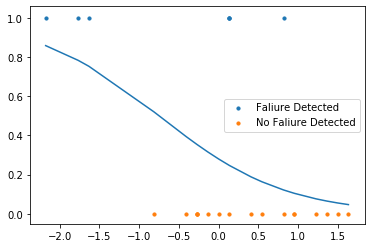

In [ ]:
# Faliure and no faliure
faliure = trainNormalizedData.loc[y == 1]
noFaliure = trainNormalizedData.loc[y == 0]

#Eq
Y = 1/(1 + np.exp(-(-0.9457 - (1.2589 * XVal))))

# plots
plt.scatter(faliure.iloc[:, 0], faliure.iloc[:, 1], s=10, label='Faliure Detected')
plt.scatter(noFaliure.iloc[:, 0], noFaliure.iloc[:, 1], s=10, label='No Faliure Detected')
plt.plot(XVal,Y)
plt.legend()
plt.show()

### Part 4

##### The actual temperature at the Challenger launch was 31 degrees Fahrenheit. According to your model what was the probability of O-ring failure on the Challenger launch? Could the engineers have used your model to provide a convincing argument to NASA? Elaborate.

In [ ]:
#Label Decision
def labelDecision(testpt, trainMean, trainSD, weight, intercept):
    test = (testpt-trainMean)/trainSD
    temparr = np.array(test)
    testPredProb = sigmoid(sigmoidPowerCalculation(weight, temparr, intercept))
    if testPredProb > 0.5:
        prob = 1
    else:
        prob = 0
    return prob, testPredProb

In [ ]:
# Test point
tpt = 31

In [ ]:
predictedLabel, predProb = labelDecision(tpt, xMean, xSD, weight, intercept)
print("Predicted label:", predictedLabel)
print("Predicted probability:", predProb)

Predicted label: 1
Predicted probability: [[0.99618241]]


At the provided temp my model is predicting a probability of 0.996 that a faliure in O Ring is imminent. But since we have very few data points and they are also scattered as can be seen from the plot above. I wouldn't recommend the launch because of the results gathered through exsisting data points.But there could be other factors at play as well which haven't been taken into account. In conclusion, I wouldn't recommend using our model as a tool for convincing NASA.